In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_excel("C:\\Users\\WELCOME\\Desktop\\Infosys Internship\\Wash trading detection\\NEAR_token_transaction_data.xlsx")

In [21]:
df.sample(10)

Transaction Hash   Blockno  \
13382  0x8c71ad12adfc81ec5a185419cb1a063b5d7a3f163d6c...  19879546   
18138  0x413e383e9d93a2760b5b9dddc7db57b402550bf1180d...  20100290   
3904   0x884e103e7c4632785d849f2bb6c78e7e441faad75995...  19423961   
8219   0x3d0e1bd178b5303f92617557ad842ada988d3cfd82f8...  19648525   
14346  0x54f5d4a244e0dc61fe11cdd88c62ee6f7713f895ea46...  19915387   
19323  0x2e1347ef801029e4d17d6bd793497db80635fd1b8802...  20149164   
2041   0xee8df52151469c6d01133f56a1294dbe3a83ca22903a...  19211403   
2481   0x5768c181163b5db3aaaaf2a1003428233559241196ee...  19287727   
16548  0x82fe0a9da035bef064999b12f74c0236d96f283b6335...  20011494   
4442   0x3bcb4060e0f4ca576383a1fb013f9ae86dbcea281b9a...  19447439   

       UnixTimestamp      DateTime (UTC)  \
13382     1715826359 2024-05-16 02:25:59   
18138     1718491943 2024-06-15 22:52:23   
3904      1710306467 2024-03-13 05:07:47   
8219      1713033995 2024-04-13 18:46:35   
14346     1716259571 2024-05-21 02:46:11   
19323     1719082511 2024-06-22 18:55:11   
2041      1707734327 2024-02-12 10:38:47   
2481      1708660283 2024-02-23 03:51:23   
16548     1717420091 2024-06-03 13:08:11   
4442      1710591899 2024-03-16 12:24:59   

                                             From  \
13382  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
18138  0xad3b67bca8935cb510c8d18bd45f0b94f54a968f   
3904   0xa6381631e0634e97e23a80a3c57f9582aa959e16   
8219   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
14346  0xe37e799d5077682fa0a244d46e5649f71457bd09   
19323  0x74de5d4fcbf63e00296fd95d33236b9794016631   
2041   0x74de5d4fcbf63e00296fd95d33236b9794016631   
2481   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
16548  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
4442   0x495a43b9aafcafaeec494943b3b0a16fa94b4b12   

                                               To     Quantity      Method  
13382  0x22f9dcf4647084d6c31b2765f6910cd85c178c18    22.238537  0x415565b0  
18138  0x5d23e37f41947ee1701b521bd28abb991fe332db    93.527386           -  
3904   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   633.646040           -  
8219   0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0     0.007979  0x415565b0  
14346  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   210.000000        Swap  
19323  0x6469b34a2a4723163c4902dbbdea728d20693c12     1.000000        Swap  
2041   0x60bedbee6717df8d57cf87b8bbcd2d0cfad20a4d    67.107321        Swap  
2481   0x1111111254eeb25477b68fb85ed929f73a960582   495.448185        Swap  
16548  0x00000000009e50a7ddb7a7b0e2ee6604fd120e49   157.028396           -  
4442   0x22f9dcf4647084d6c31b2765f6910cd85c178c18  1323.539144  0x415565b0

In [22]:
df.shape

(19836, 8)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Hash  19836 non-null  object        
 1   Blockno           19836 non-null  int64         
 2   UnixTimestamp     19836 non-null  int64         
 3   DateTime (UTC)    19836 non-null  datetime64[ns]
 4   From              19836 non-null  object        
 5   To                19836 non-null  object        
 6   Quantity          19836 non-null  float64       
 7   Method            19836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.2+ MB


In [24]:
df.columns

Index(['Transaction Hash', 'Blockno', 'UnixTimestamp', 'DateTime (UTC)',
       'From', 'To', 'Quantity', 'Method'],
      dtype='object')

In [25]:
df.describe().T

count          mean           std           min  \
Blockno        19836.0  1.968441e+07  3.220605e+05  1.890902e+07   
UnixTimestamp  19836.0  1.713463e+09  3.898956e+06  1.704069e+09   
Quantity       19836.0  3.779444e+02  8.007345e+03  0.000000e+00   

                        25%           50%           75%           max  
Blockno        1.946597e+07  1.973666e+07  1.993754e+07  2.017186e+07  
UnixTimestamp  1.710817e+09  1.714100e+09  1.716527e+09  1.719357e+09  
Quantity       3.213580e+00  7.244486e+01  2.936787e+02  7.500000e+05

In [26]:
df.isna().sum()

Transaction Hash    0
Blockno             0
UnixTimestamp       0
DateTime (UTC)      0
From                0
To                  0
Quantity            0
Method              0
dtype: int64

In [27]:
df.duplicated().sum()

7

In [28]:
df.drop_duplicates(inplace = True)

In [29]:
df.duplicated().sum().any()

False

In [30]:
col = df.columns

In [31]:
for i in col:
  print(i,df[i].nunique())

Transaction Hash 9787
Blockno 8427
UnixTimestamp 8427
DateTime (UTC) 8427
From 1823
To 3273
Quantity 13329
Method 88


In [32]:
df['Method'].value_counts()

Swap                         9427
0x415565b0                   3281
-                            2562
Execute                      1030
Sell To Uniswap               759
                             ... 
Withdraw                        1
Buy On Uniswap V2Fork           1
Fill Order                      1
Sell Shares                     1
Swap Exact Tokens For ETH       1
Name: Method, Length: 88, dtype: int64

In [33]:
df[df["Method"] == "-"]

Transaction Hash   Blockno  \
17     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
18     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
22     0x8dfe34096162408e7a8ab9327d77a34a9cd1548c3582...  18912572   
23     0xfc9c8f973df31951d03dfaca3a08dec4c5ab540c6eac...  18912669   
26     0x9a57adfe813708c9180b14dabcc08ab1dcc55505d7fe...  18912669   
...                                                  ...       ...   
19803  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19804  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19819  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19820  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19832  0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d764...  20171862   

       UnixTimestamp      DateTime (UTC)  \
17        1704111995 2024-01-01 12:26:35   
18        1704111995 2024-01-01 12:26:35   
22        1704111995 2024-01-01 12:26:35   
23        1704113195 2024-01-01 12:46:35   
26        1704113195 2024-01-01 12:46:35   
...              ...                 ...   
19803     1719340607 2024-06-25 18:36:47   
19804     1719340607 2024-06-25 18:36:47   
19819     1719351035 2024-06-25 21:30:35   
19820     1719351035 2024-06-25 21:30:35   
19832     1719356675 2024-06-25 23:04:35   

                                             From  \
17     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
18     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
22     0xa6381631e0634e97e23a80a3c57f9582aa959e16   
23     0x6469b34a2a4723163c4902dbbdea728d20693c12   
26     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
...                                           ...   
19803  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19804  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19819  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
19820  0x5b93d80da1a359340d1f339fb574bdc56763f995   
19832  0x6469b34a2a4723163c4902dbbdea728d20693c12   

                                               To    Quantity Method  
17     0xa6381631e0634e97e23a80a3c57f9582aa959e16  688.722579      -  
18     0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.518486      -  
22     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  688.722579      -  
23     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  689.054661      -  
26     0x6469b34a2a4723163c4902dbbdea728d20693c12  701.284301      -  
...                                           ...         ...    ...  
19803  0x983dfba1c0724786598af0e63a9a6f94aabd24a1  232.050000      -  
19804  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea  232.050000      -  
19819  0x5b93d80da1a359340d1f339fb574bdc56763f995   55.349356      -  
19820  0xdd66ca5783bc6cda04d73ded6bf692f5d3a03d8d   55.349356      -  
19832  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   81.711825      -  

[2562 rows x 8 columns]

In [34]:
## Replacing "-" value with "Unknown"

df["Method"] = df["Method"].apply(lambda x: x.replace("-","Unknown"))

In [35]:
df[df["Method"] == "Unknown"]

Transaction Hash   Blockno  \
17     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
18     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
22     0x8dfe34096162408e7a8ab9327d77a34a9cd1548c3582...  18912572   
23     0xfc9c8f973df31951d03dfaca3a08dec4c5ab540c6eac...  18912669   
26     0x9a57adfe813708c9180b14dabcc08ab1dcc55505d7fe...  18912669   
...                                                  ...       ...   
19803  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19804  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19819  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19820  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19832  0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d764...  20171862   

       UnixTimestamp      DateTime (UTC)  \
17        1704111995 2024-01-01 12:26:35   
18        1704111995 2024-01-01 12:26:35   
22        1704111995 2024-01-01 12:26:35   
23        1704113195 2024-01-01 12:46:35   
26        1704113195 2024-01-01 12:46:35   
...              ...                 ...   
19803     1719340607 2024-06-25 18:36:47   
19804     1719340607 2024-06-25 18:36:47   
19819     1719351035 2024-06-25 21:30:35   
19820     1719351035 2024-06-25 21:30:35   
19832     1719356675 2024-06-25 23:04:35   

                                             From  \
17     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
18     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
22     0xa6381631e0634e97e23a80a3c57f9582aa959e16   
23     0x6469b34a2a4723163c4902dbbdea728d20693c12   
26     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
...                                           ...   
19803  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19804  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19819  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
19820  0x5b93d80da1a359340d1f339fb574bdc56763f995   
19832  0x6469b34a2a4723163c4902dbbdea728d20693c12   

                                               To    Quantity   Method  
17     0xa6381631e0634e97e23a80a3c57f9582aa959e16  688.722579  Unknown  
18     0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.518486  Unknown  
22     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  688.722579  Unknown  
23     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  689.054661  Unknown  
26     0x6469b34a2a4723163c4902dbbdea728d20693c12  701.284301  Unknown  
...                                           ...         ...      ...  
19803  0x983dfba1c0724786598af0e63a9a6f94aabd24a1  232.050000  Unknown  
19804  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea  232.050000  Unknown  
19819  0x5b93d80da1a359340d1f339fb574bdc56763f995   55.349356  Unknown  
19820  0xdd66ca5783bc6cda04d73ded6bf692f5d3a03d8d   55.349356  Unknown  
19832  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   81.711825  Unknown  

[2562 rows x 8 columns]

# **EDA**

### **Quantity**

In [36]:
import math

q1 = df["Quantity"].quantile(0.25)
q3 = df["Quantity"].quantile(0.75)

iqr = q3 - q1

lower_bound = max(0,q1 - 1.5 * iqr)

upper_bound = math.ceil(q3 + 1.5 * iqr)

print(f"Lower Bound: {lower_bound} \nUpper Bound: {upper_bound}")

Lower Bound: 0 
Upper Bound: 730


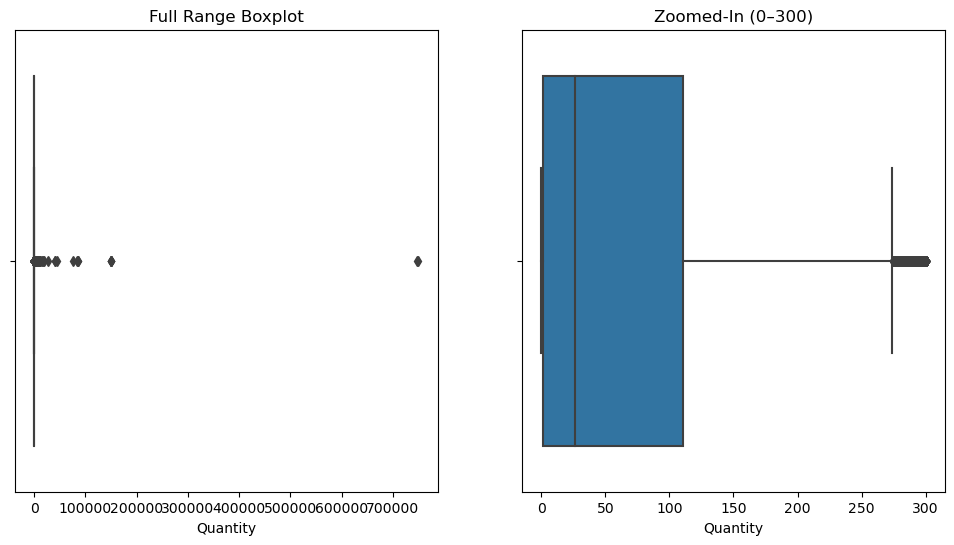

In [37]:
plt.figure(figsize=(12, 6))

# Full range boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x = df["Quantity"])
plt.title('Full Range Boxplot')

# Zoomed-in boxplot for 75% data
plt.subplot(1, 2, 2)
sns.boxplot(x=df[df["Quantity"] <= 300]["Quantity"])
plt.title('Zoomed-In (0–300)')

plt.show()

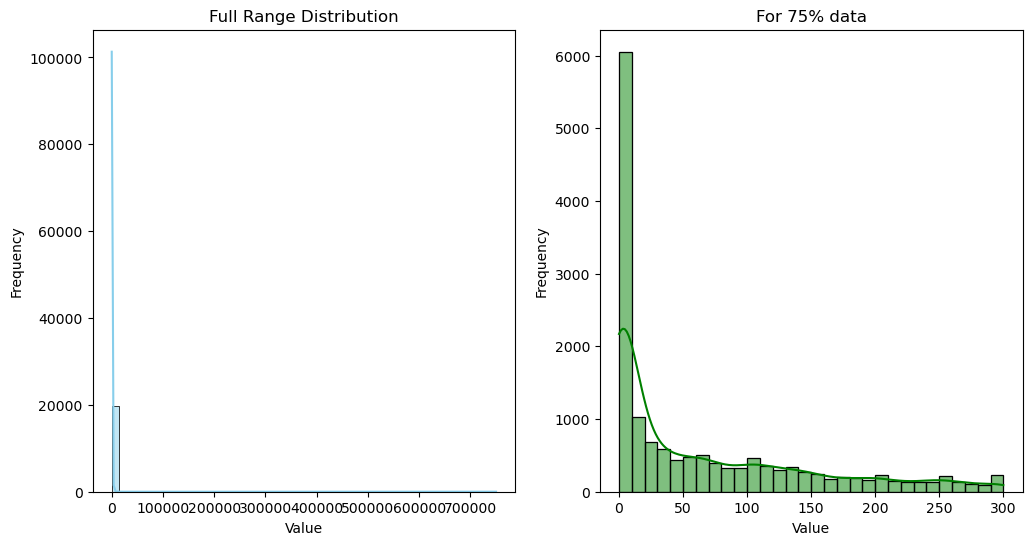

In [38]:
plt.figure(figsize=(12, 6))

# Full range histogram
plt.subplot(1, 2, 1)
sns.histplot(x = df["Quantity"], bins=50, color='skyblue', edgecolor='black' , kde = True)
plt.title('Full Range Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Zoomed-in histogram for 75% data
plt.subplot(1, 2, 2)
sns.histplot(x=df[df["Quantity"] <= 300]["Quantity"], bins=30, color='green', kde=True)
plt.title('For 75% data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()


**Outliers Analysis Using IQR**

In [39]:
outliers = pd.DataFrame(df[(df["Quantity"] > upper_bound) | (df["Quantity"] < lower_bound)])

In [40]:
outliers["Quantity"]

42        816.500000
48        810.034476
50        810.034476
76        991.532433
77        991.532433
            ...     
19706     758.799883
19707    1720.940369
19712     746.305913
19815     746.300000
19833    1198.366157
Name: Quantity, Length: 1686, dtype: float64

In [41]:
print("Shape:",outliers.shape)
print("Minimum:",outliers["Quantity"].min())
print("Maximum",outliers["Quantity"].max())

Shape: (1686, 8)
Minimum: 731.0924444797905
Maximum 750000.0


**Outlier Analysis using Z-Score Method**

In [42]:
from scipy.stats import zscore
df['Z-Score'] = zscore(df['Quantity'])
z_outliers = df[df['Z-Score'].abs() > 3]

In [43]:
z_outliers["Quantity"]

1976      40000.000000
2034      40000.000000
6498      45200.000000
6649      26353.968605
14099     75170.000000
14108     84956.000000
14109     84956.000000
14110     84744.585000
14238    150000.000000
14239    150000.000000
14334    150000.000000
14335    150000.000000
14336    150000.000000
15829    750000.000000
15830    748125.000000
Name: Quantity, dtype: float64

In [44]:
print("Shape:",z_outliers.shape)
print("Minimum:",z_outliers["Quantity"].min())
print("Maximum",z_outliers["Quantity"].max())

Shape: (15, 9)
Minimum: 26353.9686053412
Maximum 750000.0


### **Method**

In [45]:
df["Method"].nunique()

88

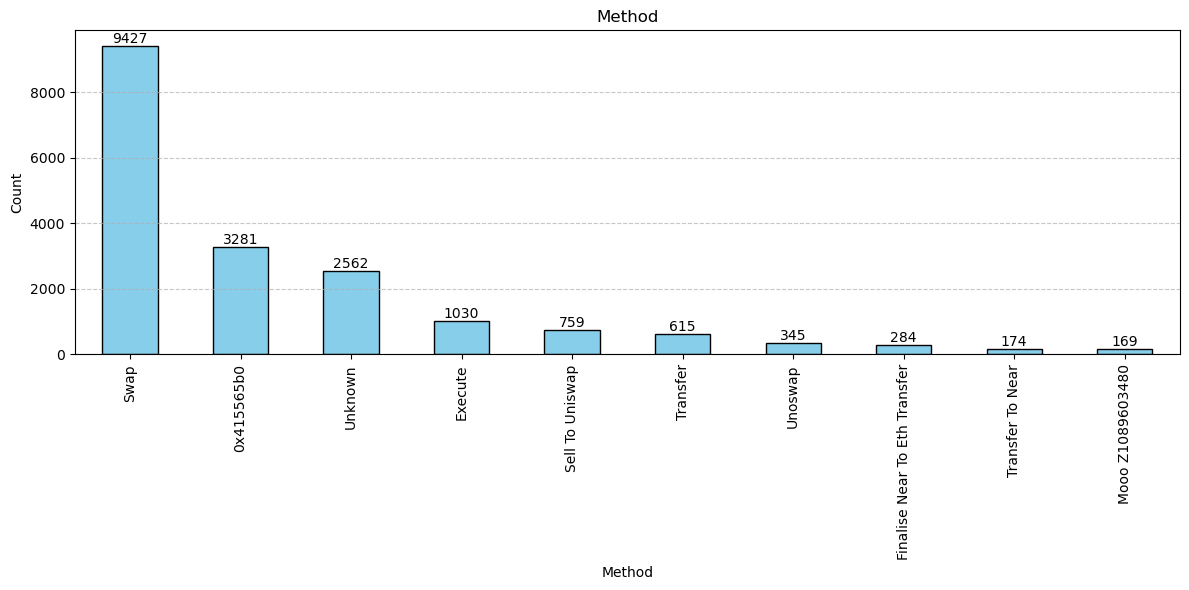

In [46]:
plt.figure(figsize=(12, 6))
top_10 = df["Method"].value_counts().head(10)
top_10.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Method")
plt.xlabel("Method")
plt.ylabel("Count")
for i, count in enumerate(top_10):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **To column**

In [47]:
###Check for the valid length of Ethereum Address

invalid_addresses = df[(df['To'].str.len() != 42)]
print("Invalid Ethereum Addresses:")
print(invalid_addresses)

Invalid Ethereum Addresses:
Empty DataFrame
Columns: [Transaction Hash, Blockno, UnixTimestamp, DateTime (UTC), From, To, Quantity, Method, Z-Score]
Index: []


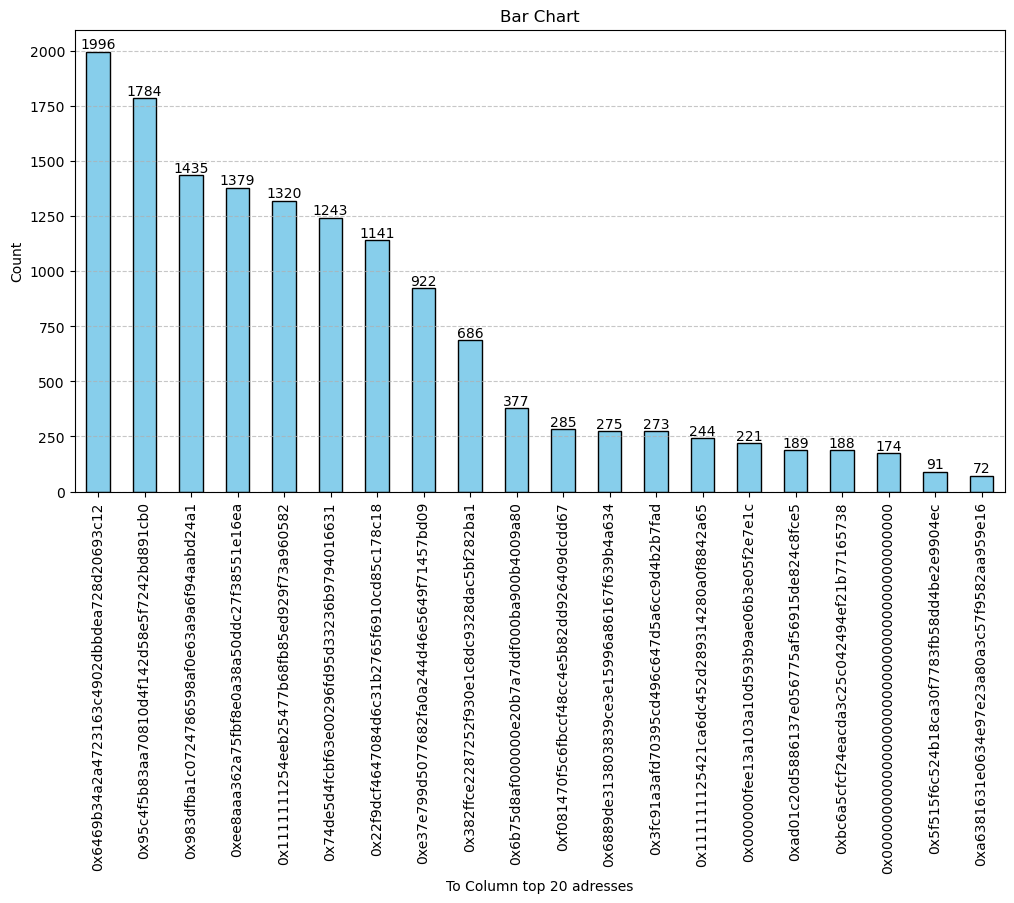

In [48]:
plt.figure(figsize=(12, 6))
top_20_in_TO_col = df["To"].value_counts().head(20)
top_20_in_TO_col.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart")
plt.xlabel("To Column top 20 adresses")
plt.ylabel("Count")
for i, count in enumerate(top_20_in_TO_col):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **From column**

In [49]:
### checking for the valid length of ethereum address
invalid_addresses = df[(df['From'].str.len() != 42)]
print("Invalid Ethereum Addresses:")
print(invalid_addresses)

Invalid Ethereum Addresses:
Empty DataFrame
Columns: [Transaction Hash, Blockno, UnixTimestamp, DateTime (UTC), From, To, Quantity, Method, Z-Score]
Index: []


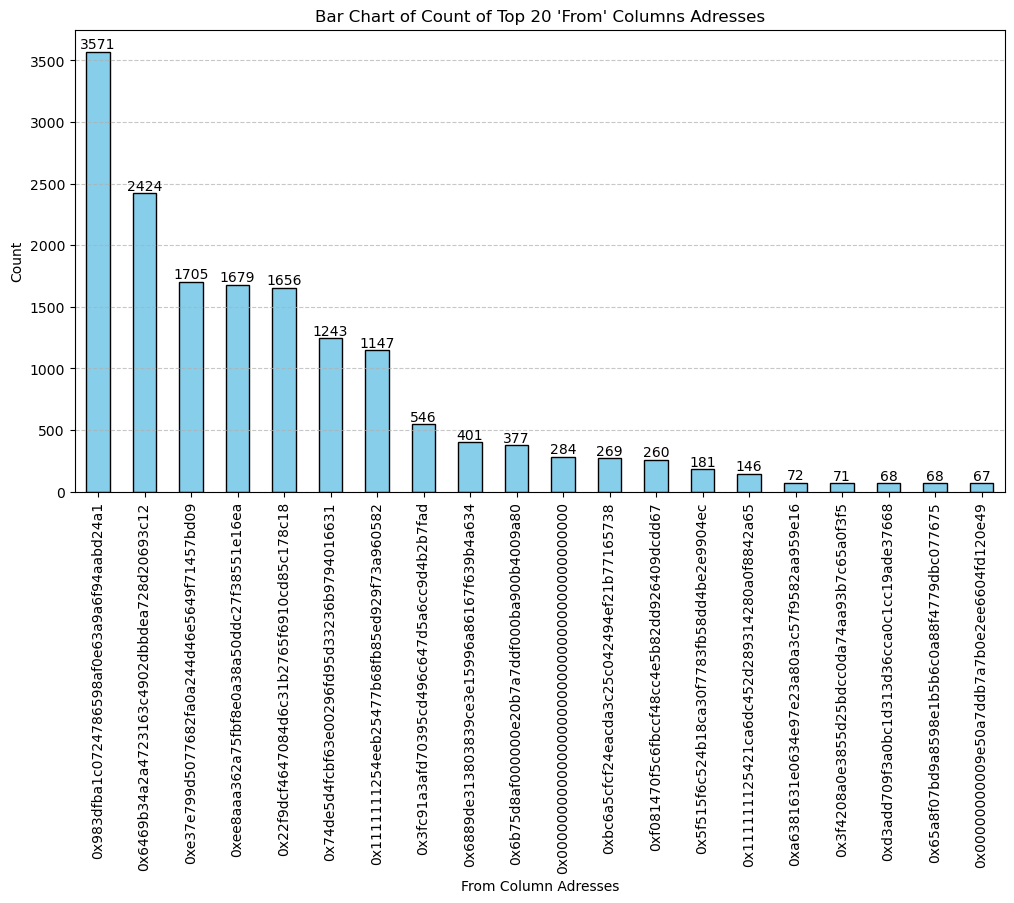

In [50]:
plt.figure(figsize=(12, 6))
top_20_from_col = df["From"].value_counts().head(20)
top_20_from_col.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart of Count of Top 20 'From' Columns Adresses")
plt.xlabel("From Column Adresses")
plt.ylabel("Count")
for i, count in enumerate(top_20_from_col):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Blockno**

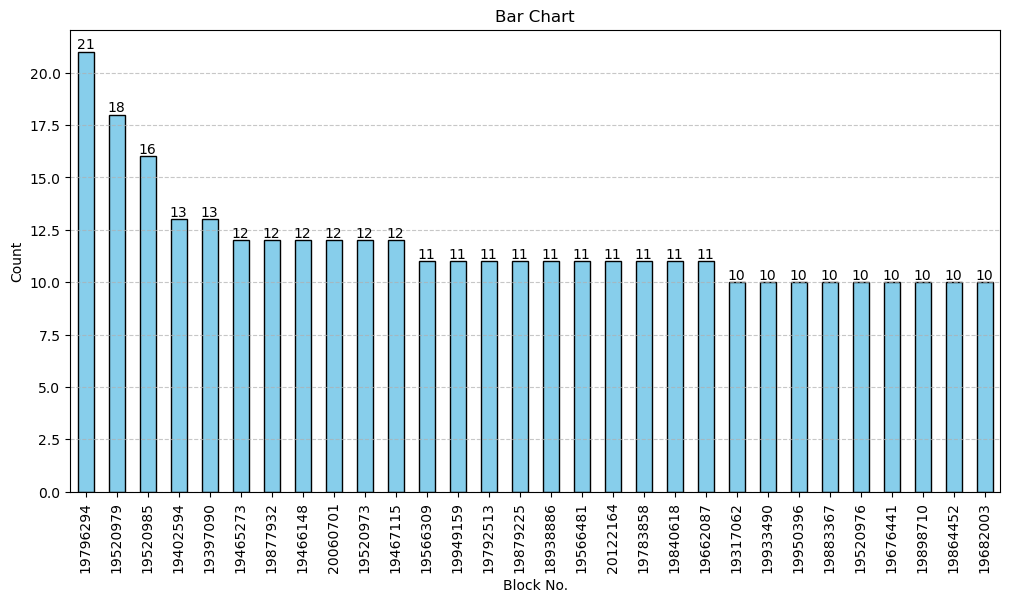

In [51]:
plt.figure(figsize=(12, 6))
top_30_blocks = df["Blockno"].value_counts().head(30)
top_30_blocks.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart")
plt.xlabel("Block No.")
plt.ylabel("Count")
for i, count in enumerate(top_30_blocks):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Transaction Hash**

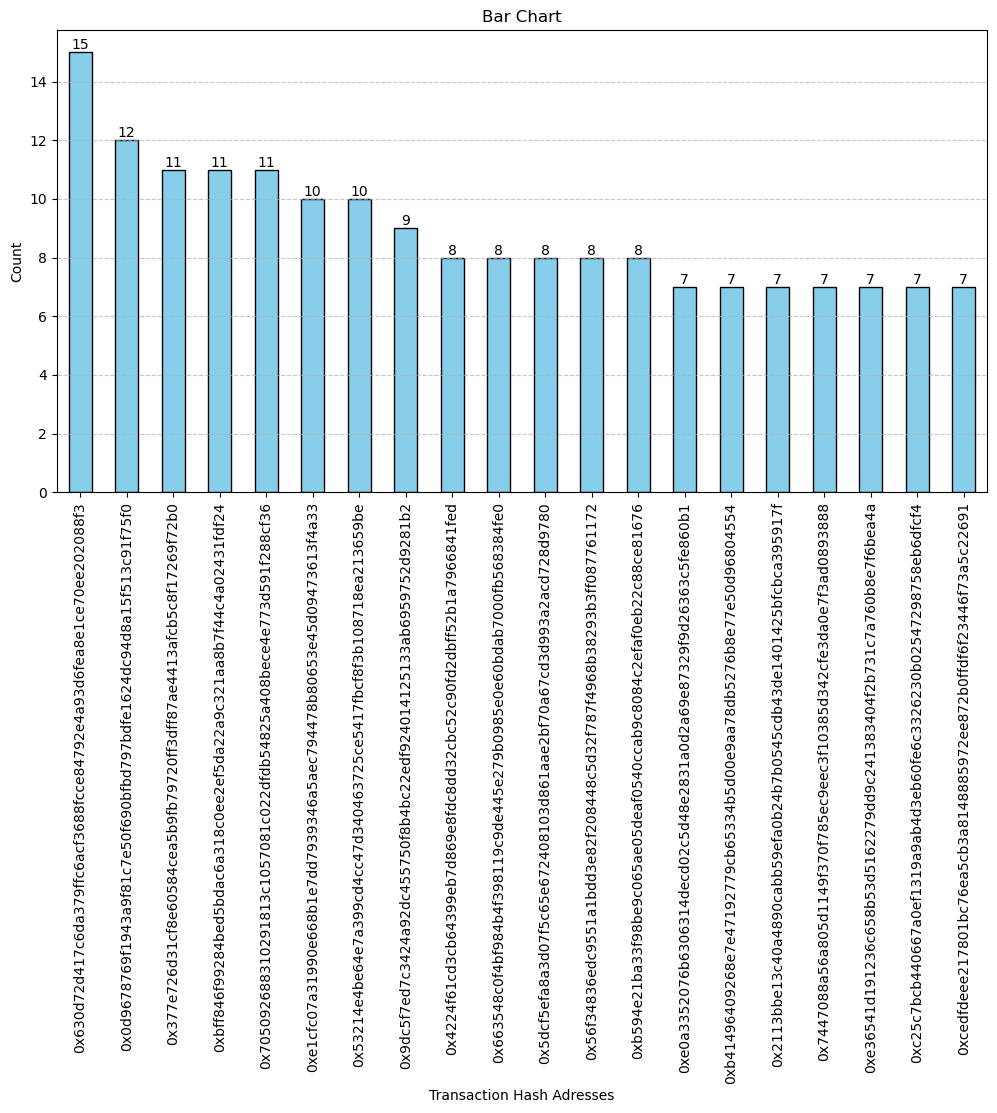

In [52]:
plt.figure(figsize=(12, 6))
top_20_hash_transactions = df["Transaction Hash"].value_counts().head(20)
top_20_hash_transactions.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart")
plt.xlabel("Transaction Hash Adresses")
plt.ylabel("Count")
for i, count in enumerate(top_20_hash_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Bivariate Analysis**

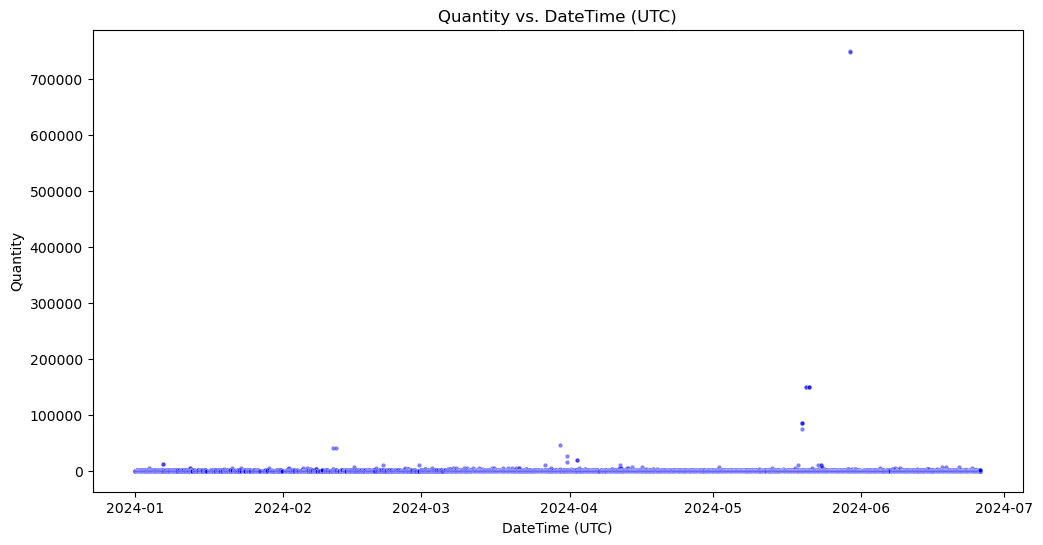

In [58]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = df['DateTime (UTC)'], y =df['Quantity'], alpha=0.5, color='blue', s=10)
plt.title("Quantity vs. DateTime (UTC)")
plt.xlabel("DateTime (UTC)")
plt.ylabel("Quantity")
plt.show()

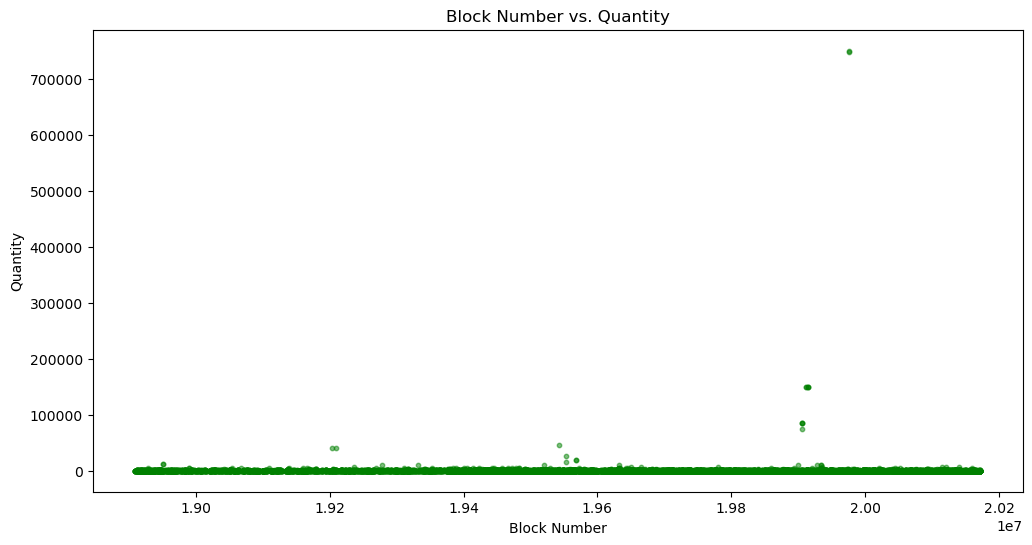

In [59]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Blockno'], df['Quantity'], alpha=0.5, color='green', s=10)
plt.title("Block Number vs. Quantity")
plt.xlabel("Block Number")
plt.ylabel("Quantity")
plt.show()


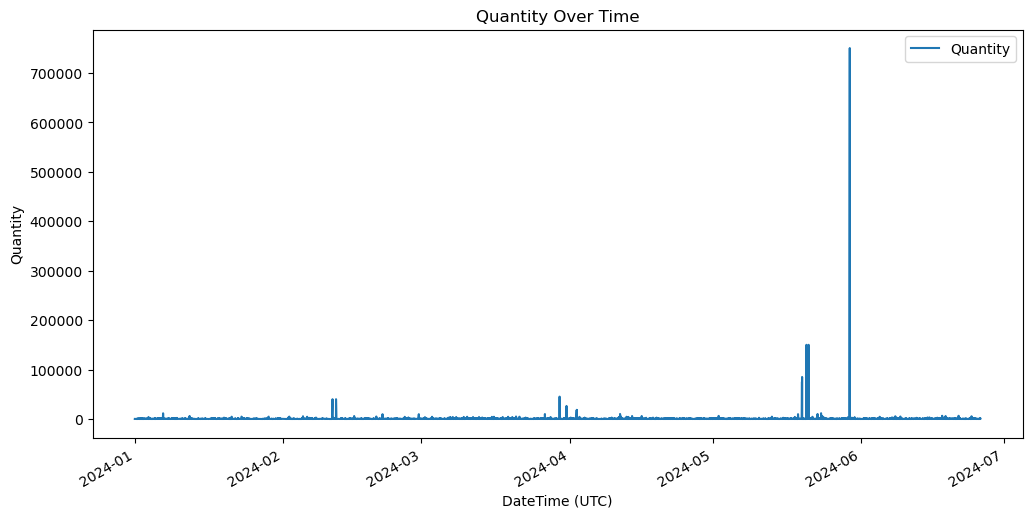

In [60]:
df.sort_values('DateTime (UTC)').plot(x='DateTime (UTC)', y='Quantity', kind='line', figsize=(12, 6))
plt.title('Quantity Over Time')
plt.xlabel('DateTime (UTC)')
plt.ylabel('Quantity')
plt.show()


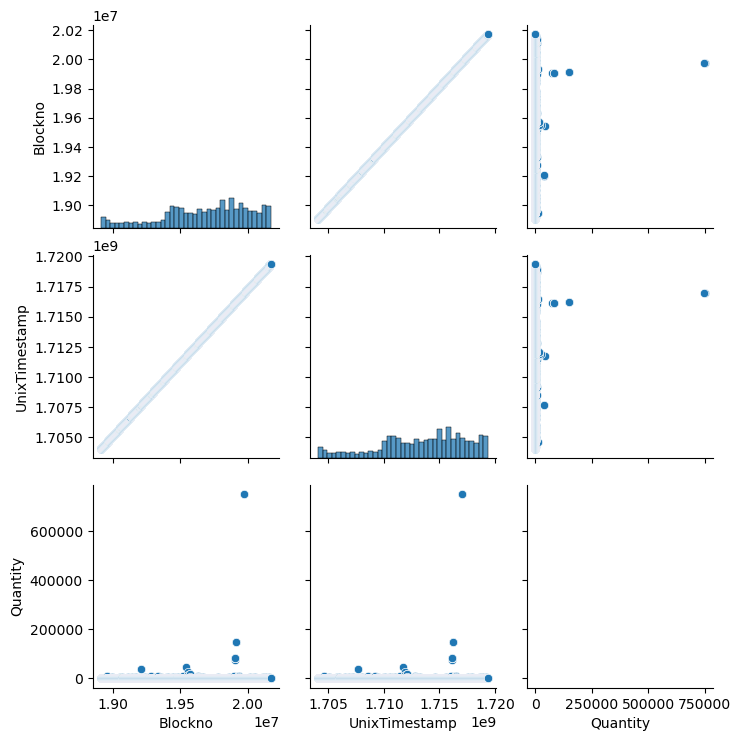

In [61]:
sns.pairplot(df[['Blockno', 'UnixTimestamp', 'Quantity']])
plt.show()


# **Feature Engineering**

In [63]:
data = df.copy()  ## making deep copy of df dataframe

In [64]:
### Creating new features from DateTime column

def new_features_from_DateTime(df):
  data = df.assign(
    month=df["DateTime (UTC)"].dt.month,
    day=df["DateTime (UTC)"].dt.day,
    year=df["DateTime (UTC)"].dt.year,
    hour=df["DateTime (UTC)"].dt.hour,
    Day=df["DateTime (UTC)"].dt.day_name(),
    is_weekend=df["DateTime (UTC)"].dt.dayofweek >= 5
)
  return data


data = new_features_from_DateTime(df)
data.sample(5)


Transaction Hash   Blockno  \
13284  0x73484d7578348e97bf353b5eafb12a8dc54484acf1f5...  19878455   
4099   0xaaa88a4258404426ffbeb1ae0fc4e53b79ae8b75b66c...  19433560   
750    0xbe47f0554103c07d4c5f55660299ab9d38d0de844e3e...  18983707   
16410  0xbdd98f44865c61b8b8c286460f93f179d101cc9b9fb3...  20001964   
12711  0x5e85bf54772d4eeb883fba1fb580300ae1cfe8a7c423...  19856092   

       UnixTimestamp      DateTime (UTC)  \
13284     1715813147 2024-05-15 22:45:47   
4099      1710423107 2024-03-14 13:31:47   
750       1704976391 2024-01-11 12:33:11   
16410     1717305083 2024-06-02 05:11:23   
12711     1715542895 2024-05-12 19:41:35   

                                             From  \
13284  0x3f2a8181f6f1cff60cdafab02dd1a27d5a4f035b   
4099   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
750    0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
16410  0xb6585d84f149c388a40541bb4bd2f24ef1006b39   
12711  0xe37e799d5077682fa0a244d46e5649f71457bd09   

                                               To     Quantity    Method  \
13284  0x087aaaaab98a5b52bc1875fb31fc8c5593b791d6    12.127963  Transfer   
4099   0x1111111254eeb25477b68fb85ed929f73a960582   487.353593      Swap   
750    0x1111111254eeb25477b68fb85ed929f73a960582  1052.694345      Swap   
16410  0x74de5d4fcbf63e00296fd95d33236b9794016631     1.000000      Swap   
12711  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea    12.682030      Swap   

        Z-Score  month  day  year  hour        Day  is_weekend  
13284 -0.045695      5   15  2024    22  Wednesday       False  
4099   0.013645      3   14  2024    13   Thursday       False  
750    0.084237      1   11  2024    12   Thursday       False  
16410 -0.047084      6    2  2024     5     Sunday        True  
12711 -0.045626      5   12  2024    19     Sunday        True

In [65]:
# Define bins and labels based on the statistics of quantity column
bins = [0, 3.21358, 72.444861, 293.678666, 1000 , float('inf')]  # Min, 25%, 50%, 75%, Max
labels = ["Very Low", "Low", "Medium", "High" , "Very High"]

# Create a new column for Quantity categories
data["Quantity Category"] = pd.cut(data["Quantity"], bins=bins, labels=labels)

# Check the distribution
print(data["Quantity Category"].value_counts())


Medium       4959
Low          4956
Very Low     4947
High         4224
Very High     735
Name: Quantity Category, dtype: int64


In [66]:
# Flag high quantity transactions
data["High Quantity Flag"] = data["Quantity"] > 294  ### Here we take threshold as 75% quantile of the Quantity column

# Check if From and To addresses are the same (self-transaction)
data["Is Self Transaction"] = data["From"] == data["To"]


In [67]:
data.sample(10)

Transaction Hash   Blockno  \
2117   0x20c6a33ea9580f7e1d5af3746a233dae91b616f41ec5...  19223155   
19026  0x47ff2d2f17f4643ba6c6ae8c7e1c6d0990d4dd5c9f6f...  20138549   
1591   0xdd3bb935cb9c04d22bac255af158fd4834d2de9ca376...  19134508   
13241  0x41b65f22ee9b6fd2b598b03999364a6a6623b03f6b76...  19877841   
9927   0x6ef35570018f125423a53efcd338455e44da6deb2921...  19736845   
12568  0xc77b1eff3332c3374606851d44705879510ab525d295...  19849874   
17157  0x25b03c4ac33af9a2dd8a2162d6a5fac6d13655833ae7...  20044484   
12698  0x087f98e8558e921548a092c3b0484b3eca017e7b7525...  19855452   
19302  0xccf929c21671e7291d97197dea509a644acdbcb22627...  20149110   
5673   0xe9d503d285b9a4fbcd10a3c36561a0b0a07cec5a57d3...  19507652   

       UnixTimestamp      DateTime (UTC)  \
2117      1707876707 2024-02-14 02:11:47   
19026     1718954267 2024-06-21 07:17:47   
1591      1706801771 2024-02-01 15:36:11   
13241     1715805767 2024-05-15 20:42:47   
9927      1714101983 2024-04-26 03:26:23   
12568     1715467715 2024-05-11 22:48:35   
17157     1717817999 2024-06-08 03:39:59   
12698     1715535203 2024-05-12 17:33:23   
19302     1719081851 2024-06-22 18:44:11   
5673      1711322843 2024-03-24 23:27:23   

                                             From  \
2117   0x74de5d4fcbf63e00296fd95d33236b9794016631   
19026  0x8e0178e66efee9071fe339abb73bd9fc900a95b7   
1591   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
13241  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
9927   0x6469b34a2a4723163c4902dbbdea728d20693c12   
12568  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
17157  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
12698  0xd42b0ecf8a9f8ba9db7b0c989d73cf0bd5f83b66   
19302  0x74de5d4fcbf63e00296fd95d33236b9794016631   
5673   0x67e302de570a104459c4c4af659c55ff3f8dbb62   

                                               To    Quantity  \
2117   0xf081470f5c6fbccf48cc4e5b82dd926409dcdd67  267.912343   
19026  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   15.884128   
1591   0x22f9dcf4647084d6c31b2765f6910cd85c178c18   13.712686   
13241  0xf3d49f88efcc1635c6f4daee36560bb4cbc3a3ac   62.707852   
9927   0xf081470f5c6fbccf48cc4e5b82dd926409dcdd67   73.486419   
12568  0x89f0b1409574101f9502a3b503d3b47ca6dc5ba1  138.251314   
17157  0x425a40ff386313e945d273fd5c55b58208a7e5fe  119.792519   
12698  0x06abe406f8b9d5319cf7a7e83a074842f886e714  183.141499   
19302  0x6469b34a2a4723163c4902dbbdea728d20693c12    1.000000   
5673   0x6469b34a2a4723163c4902dbbdea728d20693c12    4.153580   

                                         Method   Z-Score  month  day  year  \
2117                                       Swap -0.013756      2   14  2024   
19026                                0x415565b0 -0.045226      6   21  2024   
1591                                 0x415565b0 -0.045497      2    1  2024   
13241                                0x415565b0 -0.039379      5   15  2024   
9927                                       Swap -0.038033      4   26  2024   
12568                             Process Route -0.029946      5   11  2024   
17157               Execute Meta Transaction V2 -0.032251      6    8  2024   
12698                                   Unknown -0.024341      5   12  2024   
19302                                      Swap -0.047084      6   22  2024   
5673   Multiplex Multi Hop Sell Token For Token -0.046690      3   24  2024   

       hour        Day  is_weekend Quantity Category  High Quantity Flag  \
2117      2  Wednesday       False            Medium               False   
19026     7     Friday       False               Low               False   
1591     15   Thursday       False               Low               False   
13241    20  Wednesday       False               Low               False   
9927      3     Friday       False            Medium               False   
12568    22   Saturday        True            Medium               False   
17157     3   Saturday        True            Medium               False   
12698 

In [68]:
# Flag outliers based on Z-Score (e.g., abs(Z-Score) > 3)
data["Is Outlier"] = data["Z-Score"].abs() > 3


In [69]:
data["Log Quantity"] = np.log1p(data["Quantity"])   ## For Handle Skewness in the Quantity colummn

In [70]:
# Count transactions per address
data["From Activity Count"] = data["From"].map(data["From"].value_counts())
data["To Activity Count"] = data["To"].map(data["To"].value_counts())

# Count unique addresses
print(data["From"].nunique())
print(data["To"].nunique())


1823
3273


In [71]:
# Sort by wallet and DateTime
data = data.sort_values(by=["From", "DateTime (UTC)"])

# Cumulative sum of Quantity per wallet
data["Cumulative Quantity"] = data.groupby("From")["Quantity"].cumsum()


**Network analysis**

In [72]:
import networkx as nx
import pandas as pd


In [73]:
#Create a directed graph from the 'From' and 'To' columns
G = nx.DiGraph()

# Add edges with weights if required (e.g., using 'Quantity' as weight)
for index, row in data.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Quantity'])

# Calculate centralities
# Degree centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Map centralities back to the DataFrame
# Create new columns in the DataFrame to store centrality measures for 'From' nodes
data['from_degree_centrality'] = data['From'].map(degree_centrality)
data['from_betweenness_centrality'] = data['From'].map(betweenness_centrality)
data['from_closeness_centrality'] = data['From'].map(closeness_centrality)

# Similarly, create columns for 'To' nodes
data['to_degree_centrality'] = data['To'].map(degree_centrality)
data['to_betweenness_centrality'] = data['To'].map(betweenness_centrality)
data['to_closeness_centrality'] = data['To'].map(closeness_centrality)



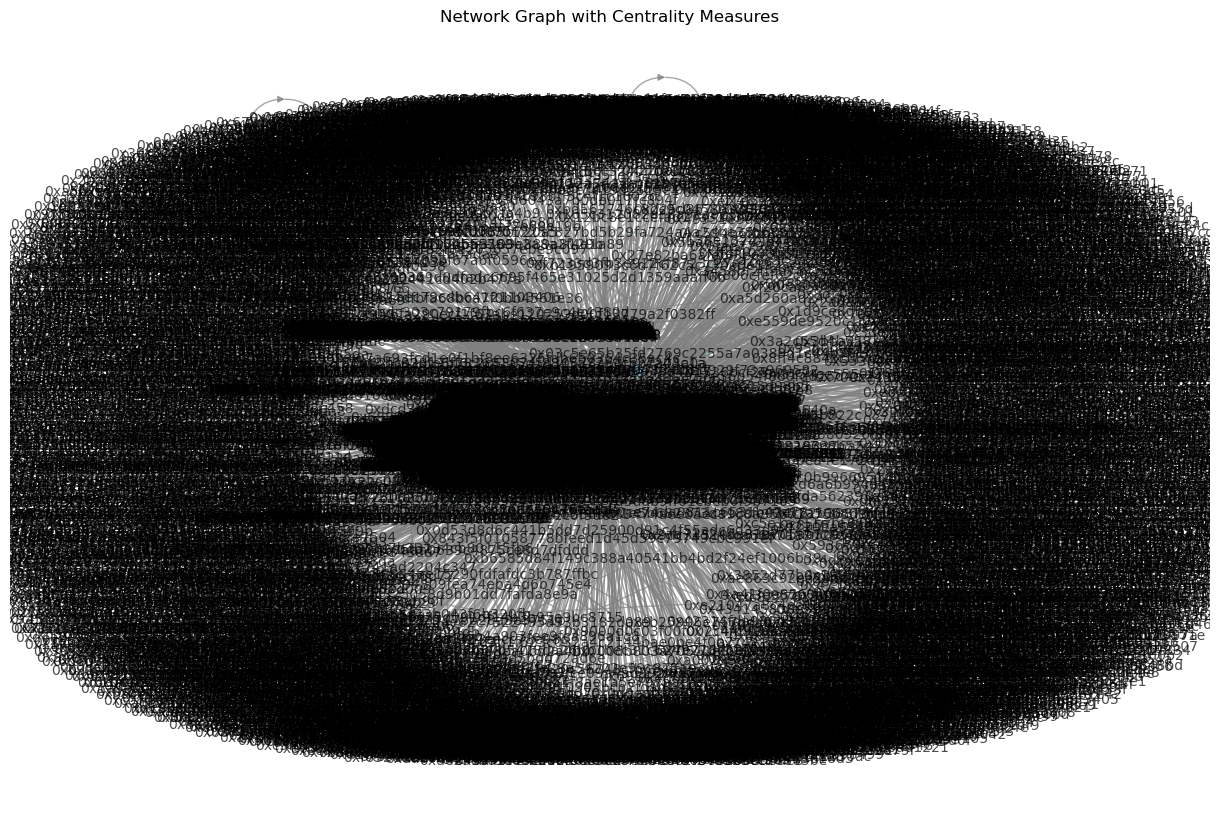

In [74]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your dataset is already loaded into a DataFrame called data
# Ensure the DataFrame has the feature-engineered columns, including 'From' and 'To'

# Step 1: Create a directed graph from the 'From' and 'To' columns
G = nx.DiGraph()

# Add edges with weights if required (e.g., using 'Quantity' as weight)
for index, row in data.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Quantity'])

# Step 2: Visualize the graph
plt.figure(figsize=(12, 8))

# Draw the network
# Node size is proportional to degree centrality
node_sizes = [500 * nx.degree_centrality(G)[node] for node in G.nodes()]
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]  # Scale for visualizing edge weights

# Using a spring layout for better spacing of nodes
pos = nx.spring_layout(G, seed=42)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=node_sizes,
    node_color='skyblue',
    edge_color='gray',
    width=1.0,
    alpha=0.7,
    font_size=10
)

# Display the plot
plt.title("Network Graph with Centrality Measures")
plt.show()


In [75]:
import plotly.graph_objects as go
import networkx as nx

# Assuming 'G' is your networkx graph and 'data' is your DataFrame

# 1. Create node positions for visualization
pos = nx.spring_layout(G)  # You can experiment with other layout algorithms

# 2. Create edge traces
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# 3. Create node traces
node_x = []
node_y = []
node_text = []  # To display node information on hover
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"Address: {node}<br>Degree: {G.degree(node)}")
    # Customize hover text with relevant information

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu', # Choose a colorscale
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# 4. Color nodes based on degree centrality (or other metrics)
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(f"Address: {adjacencies[0]}<br>Degree: {len(adjacencies[1])}") # Customize hover text

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# 5. Create the figure and add traces
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='NEAR Token Transaction Network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()

**Analysis of data**

In [76]:
data.sample(5)

Transaction Hash   Blockno  \
1227   0xe67d03f6bd906b4d48c745fa2433654c5d272ba80236...  19070535   
107    0xbdc42c4e464a58a8d3943746a1f52d343b3c24325a13...  18916654   
9828   0x3a1a634c64e01d30ce0ea4be1111c8a8372063eb613c...  19732983   
925    0x1c5c484e85837665c3478334ba001f6b68e99669b5e3...  19015055   
15335  0x6ba691b371130402ab7ccd8a6c2ed6ac1a5c36632c86...  19953608   

       UnixTimestamp      DateTime (UTC)  \
1227      1706027015 2024-01-23 16:23:35   
107       1704161543 2024-01-02 02:12:23   
9828      1714055363 2024-04-25 14:29:23   
925       1705355147 2024-01-15 21:45:47   
15335     1716721127 2024-05-26 10:58:47   

                                             From  \
1227   0xb0f8314c289aa839ac48e331ba5a250d6ea3c4df   
107    0x6469b34a2a4723163c4902dbbdea728d20693c12   
9828   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
925    0x74de5d4fcbf63e00296fd95d33236b9794016631   
15335  0xe37e799d5077682fa0a244d46e5649f71457bd09   

                                               To    Quantity    Method  \
1227   0x8a750baa26806190aec965c286e2876d3c3ec6b0  136.470000  Transfer   
107    0x74de5d4fcbf63e00296fd95d33236b9794016631   45.413197      Swap   
9828   0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.340819      Swap   
925    0x6469b34a2a4723163c4902dbbdea728d20693c12    0.456210      Swap   
15335  0x6469b34a2a4723163c4902dbbdea728d20693c12   12.299665      Swap   

        Z-Score  month  ...  Log Quantity  From Activity Count  \
1227  -0.030169      1  ...      4.923406                    1   
107   -0.041538      1  ...      3.837584                 2424   
9828  -0.047167      4  ...      0.293280                 3571   
925   -0.047152      1  ...      0.375837                 1243   
15335 -0.045673      5  ...      2.587739                 1705   

       To Activity Count Cumulative Quantity  from_degree_centrality  \
1227                   1          136.470000                0.000284   
107                 1243         1878.631323                0.302418   
9828                1784       464201.789170                0.034708   
925                 1996        10598.083117                0.234993   
15335               1996       327776.212642                0.096444   

      from_betweenness_centrality  from_closeness_centrality  \
1227                     0.000000                   0.000000   
107                      0.373287                   0.234901   
9828                     0.019162                   0.212838   
925                      0.140243                   0.205530   
15335                    0.069457                   0.213470   

       to_degree_centrality  to_betweenness_centrality  \
1227               0.000569                   0.000260   
107                0.234993                   0.140243   
9828               0.000853                   0.000386   
925                0.302418                   0.373287   
15335              0.302418                   0.373287   

       to_closeness_centrality  
1227                  0.000284  
107                   0.205530  
9828                  0.144766  
925                   0.234901  
15335                 0.234901  

[5 rows x 29 columns]

In [77]:
data.isnull().sum()

Transaction Hash               0
Blockno                        0
UnixTimestamp                  0
DateTime (UTC)                 0
From                           0
To                             0
Quantity                       0
Method                         0
Z-Score                        0
month                          0
day                            0
year                           0
hour                           0
Day                            0
is_weekend                     0
Quantity Category              8
High Quantity Flag             0
Is Self Transaction            0
Is Outlier                     0
Log Quantity                   0
From Activity Count            0
To Activity Count              0
Cumulative Quantity            0
from_degree_centrality         0
from_betweenness_centrality    0
from_closeness_centrality      0
to_degree_centrality           0
to_betweenness_centrality      0
to_closeness_centrality        0
dtype: int64

In [78]:
data.describe()

Blockno  UnixTimestamp       Quantity       Z-Score         month  \
count  1.982900e+04   1.982900e+04   19829.000000  1.982900e+04  19829.000000   
mean   1.968449e+07   1.713463e+09     378.076434 -4.552991e-17      4.092642   
std    3.220912e+05   3.899327e+06    8008.755294  1.000025e+00      1.472990   
min    1.890902e+07   1.704069e+09       0.000000 -4.720908e-02      1.000000   
25%    1.946602e+07   1.710818e+09       3.214500 -4.680770e-02      3.000000   
50%    1.973678e+07   1.714101e+09      72.480398 -3.815871e-02      4.000000   
75%    1.993754e+07   1.716527e+09     293.707990 -1.053479e-02      5.000000   
max    2.017186e+07   1.719357e+09  750000.000000  9.360266e+01      6.000000   

                day     year          hour  Log Quantity  From Activity Count  \
count  19829.000000  19829.0  19829.000000  19829.000000         19829.000000   
mean      15.548590   2024.0     11.957386      3.754155          1557.523577   
std        8.428048      0.0      7.158446      2.335075          1223.679990   
min        1.000000   2024.0      0.000000      0.000000             1.000000   
25%        8.000000   2024.0      5.000000      1.438531           284.000000   
50%       16.000000   2024.0     13.000000      4.297019          1656.000000   
75%       23.000000   2024.0     18.000000      5.685985          2424.000000   
max       31.000000   2024.0     23.000000     13.527830          3571.000000   

       To Activity Count  Cumulative Quantity  from_degree_centrality  \
count       19829.000000         1.982900e+04            19829.000000   
mean          891.534974         1.713366e+05                0.107344   
std           725.054807         1.728831e+05                0.106420   
min             1.000000         0.000000e+00                0.000284   
25%            21.000000         1.924989e+04                0.006543   
50%          1141.000000         1.308461e+05                0.070555   
75%          1435.000000         2.720136e+05                0.234993   
max          1996.000000         1.271448e+06                0.302418   

       from_betweenness_centrality  from_closeness_centrality  \
count                 19829.000000               19829.000000   
mean                      0.093251                   0.190616   
std                       0.117655                   0.042788   
min                       0.000000                   0.000000   
25%                       0.002834                   0.162960   
50%                       0.045942                   0.209364   
75%                       0.140243                   0.213470   
max                       0.373287                   0.234901   

       to_degree_centrality  to_betweenness_centrality  \
count          19829.000000               19829.000000   
mean               0.085831                   0.074212   
std                0.107410                   0.113461   
min                0.000284                   0.000000   
25%                0.000853                   0.000000   
50%                0.011949                   0.019162   
75%                0.157610                   0.114195   
max                0.302418                   0.373287   

       to_closeness_centrality  
count             19829.000000  
mean                  0.177432  
std                   0.039462  
min                   0.000000  
25%                   0.144766  
50%                   0.176537  
75%                   0.212838  
max                   0.234901

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19829 entries, 13 to 10613
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction Hash             19829 non-null  object        
 1   Blockno                      19829 non-null  int64         
 2   UnixTimestamp                19829 non-null  int64         
 3   DateTime (UTC)               19829 non-null  datetime64[ns]
 4   From                         19829 non-null  object        
 5   To                           19829 non-null  object        
 6   Quantity                     19829 non-null  float64       
 7   Method                       19829 non-null  object        
 8   Z-Score                      19829 non-null  float64       
 9   month                        19829 non-null  int64         
 10  day                          19829 non-null  int64         
 11  year                         19829 non-n

 Distribution of transactions by method

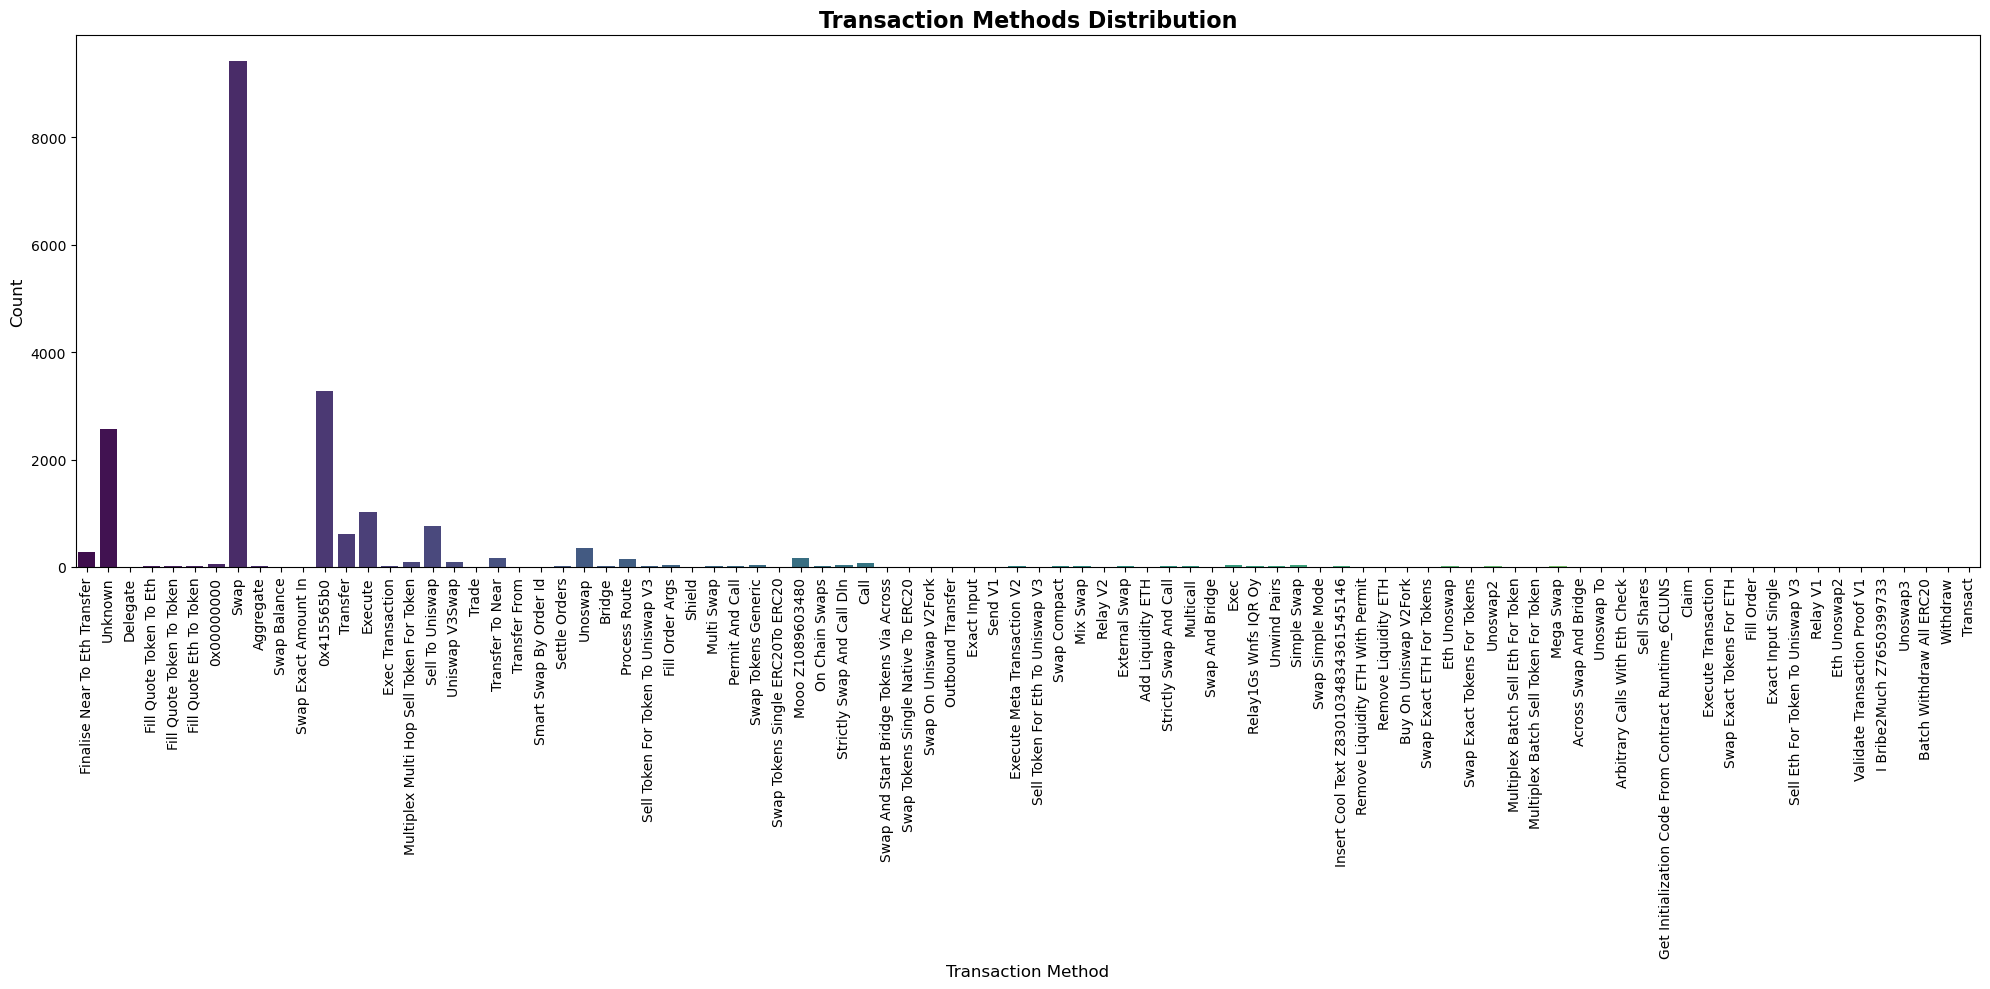

In [80]:
plt.figure(figsize=(20, 10))
sns.countplot(data=data, x='Method', palette='viridis')
plt.title('Transaction Methods Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

 Analyze quantity distribution

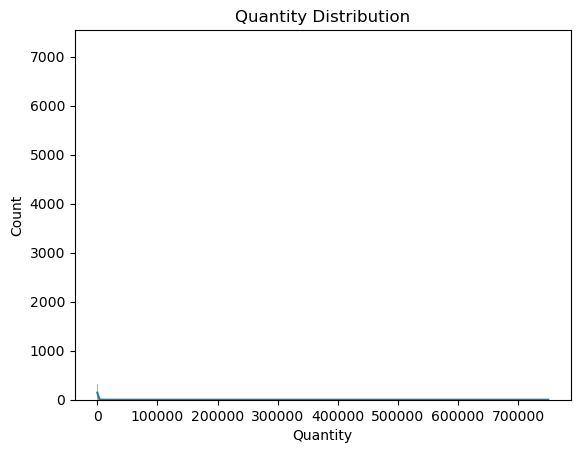

In [81]:
sns.histplot(data=data, x='Quantity', kde=True)
plt.title('Quantity Distribution')
plt.show()

Correlation matrix

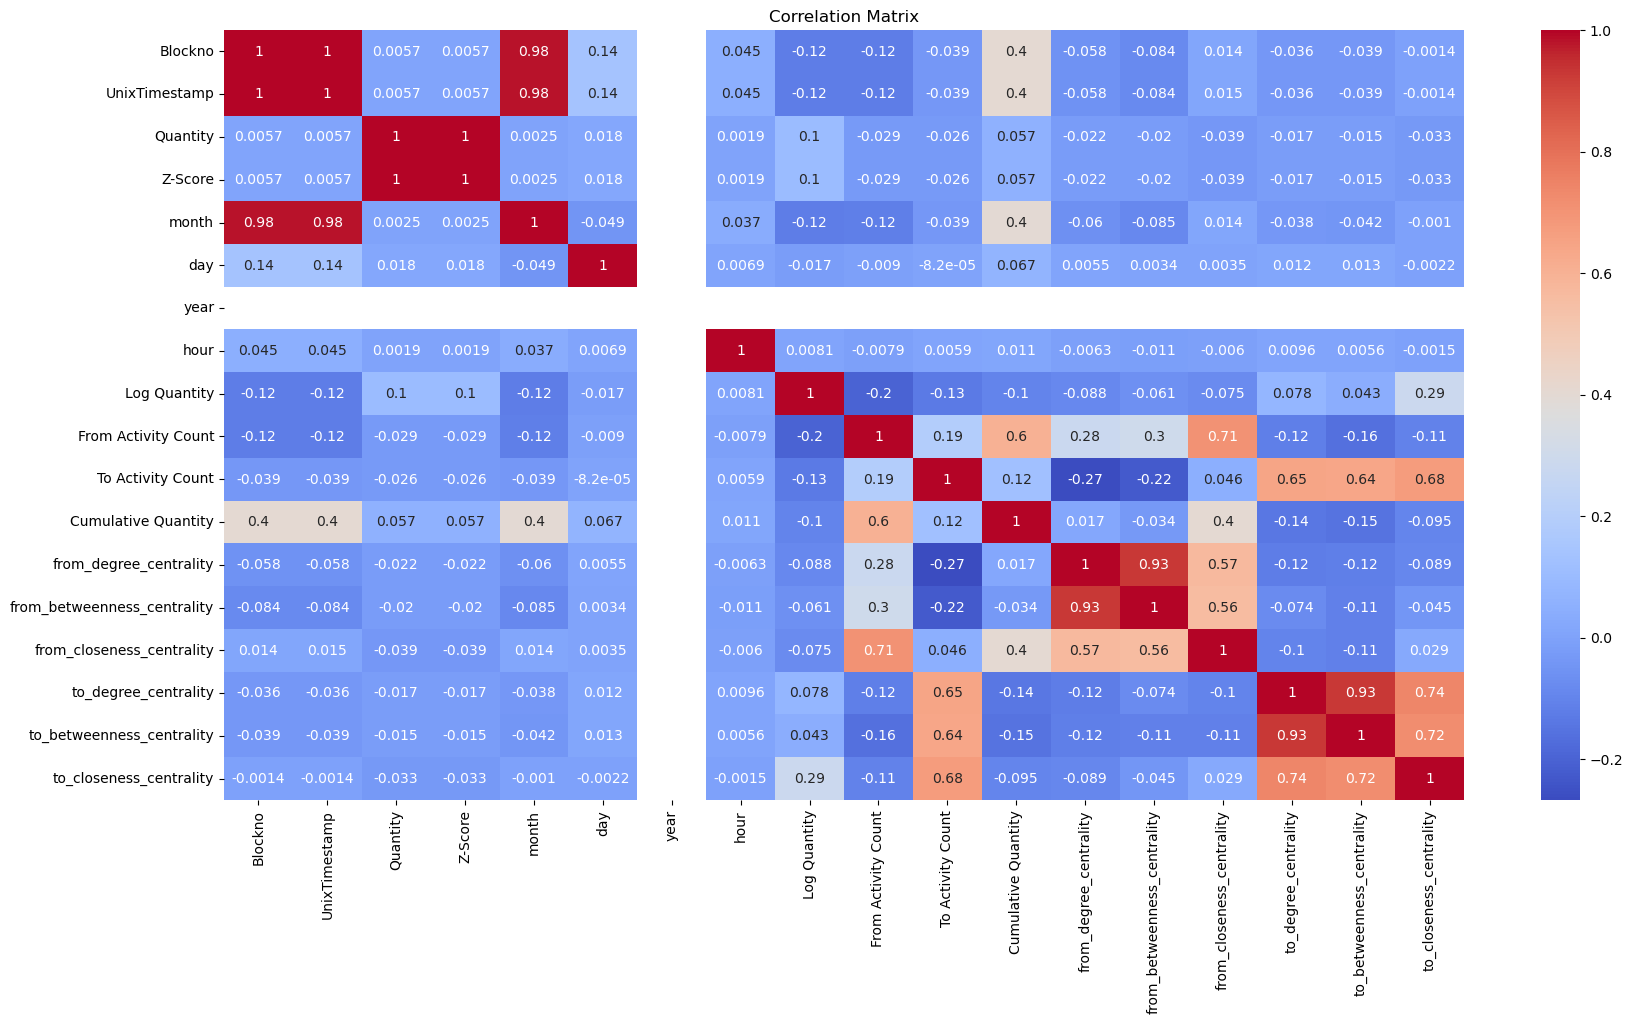

In [82]:
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Analyze Z-Score for outliers

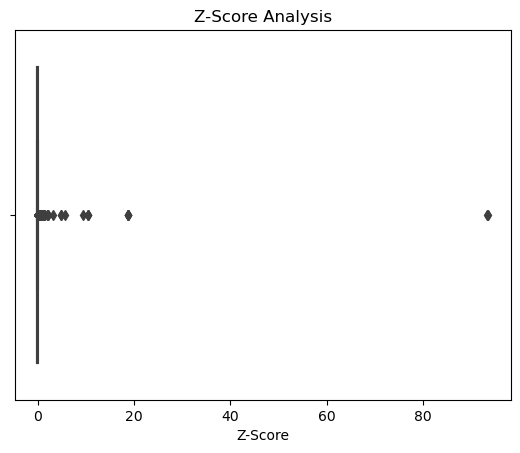

In [83]:
sns.boxplot(data=data, x='Z-Score')
plt.title('Z-Score Analysis')
plt.show()

Group transactions by month , day and hour

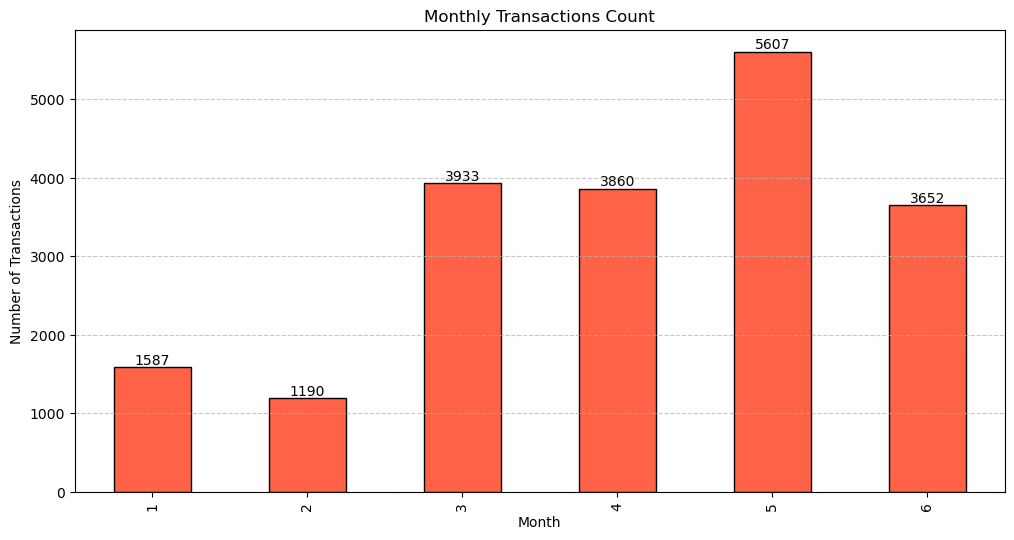

In [84]:
plt.figure(figsize = (12,6))
monthly_transactions = data.groupby('month')['Transaction Hash'].count()
monthly_transactions.plot(kind='bar', color='tomato', edgecolor = "k")
plt.title('Monthly Transactions Count')
plt.ylabel('Number of Transactions')
for i, count in enumerate(monthly_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Month')
plt.show()

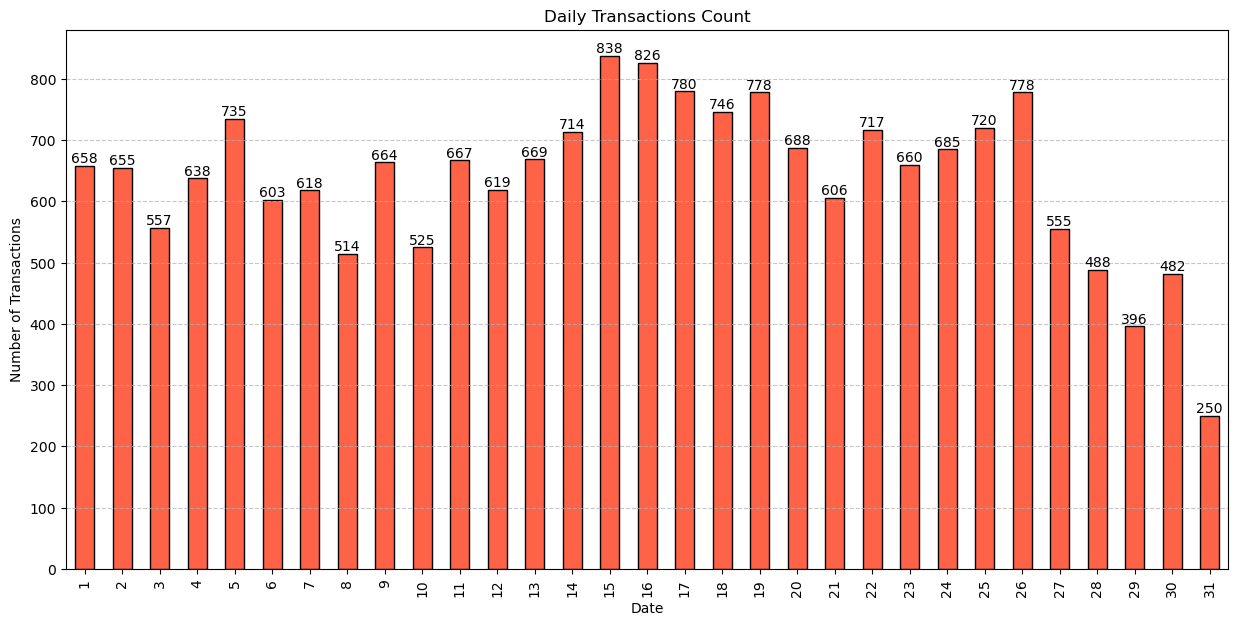

In [85]:
plt.figure(figsize = (15,7))
daily_transactions = data.groupby('day')['Transaction Hash'].count()
daily_transactions.plot(kind='bar', color='tomato', edgecolor = "k")
plt.title('Daily Transactions Count')
plt.ylabel('Number of Transactions')
for i, count in enumerate(daily_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Date')
plt.show()

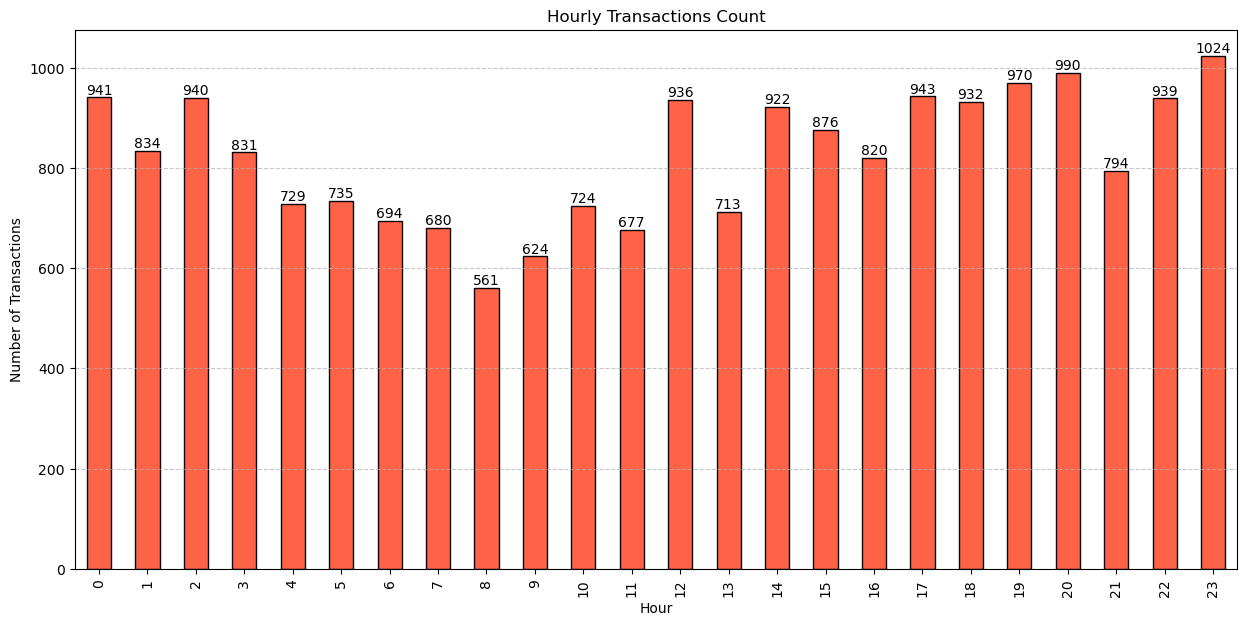

In [86]:
plt.figure(figsize = (15,7))
hourly_transactions = data.groupby('hour')['Transaction Hash'].count()
hourly_transactions.plot(kind='bar', color='tomato', edgecolor = "k")
plt.title('Hourly Transactions Count')
plt.ylabel('Number of Transactions')
plt.xlabel('Hour')
for i, count in enumerate(hourly_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Weekend vs. Weekday transactions

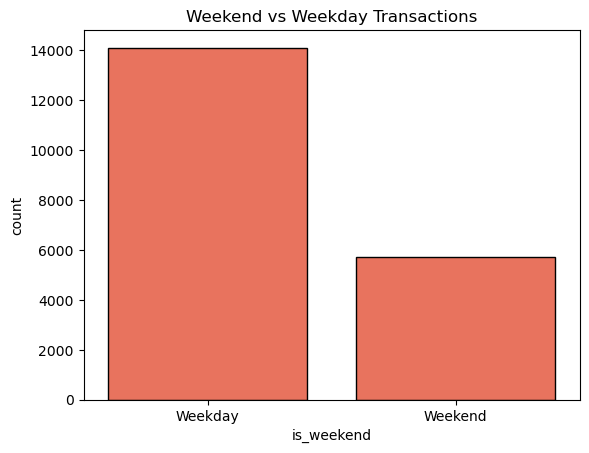

In [87]:
sns.countplot(data=data, x='is_weekend' , color = "tomato" , edgecolor = "k")
plt.title('Weekend vs Weekday Transactions')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

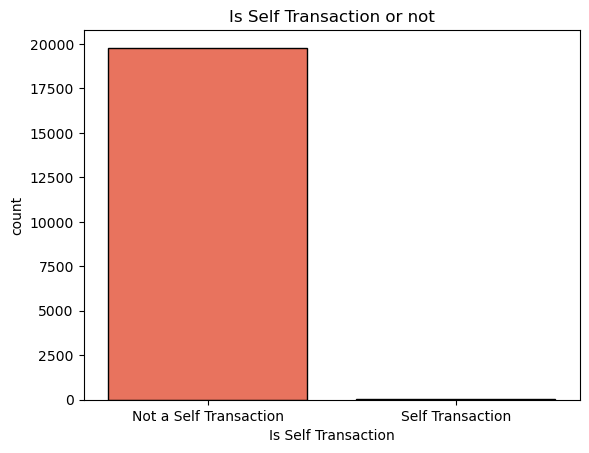

In [88]:
sns.countplot(data=data, x='Is Self Transaction' , color = "tomato" , edgecolor = "k")
plt.title('Is Self Transaction or not')
plt.xticks([0, 1], ['Not a Self Transaction', 'Self Transaction'])
plt.show()

In [89]:
## Analysis
## Year column is not important (2024 year data only)
##  "is slef transaction" column contain mostly 1 type of value
## people generally do transaction in weekdays

In [90]:
#data.to_csv("processed_near_token_data.csv", index=False)
#this processed dataset in Group2/Dataset folder

Convert Categorical Columns to Numerical

In [ ]:
# Example: Convert True/False to 0/1
categorical_columns = ['is_weekend', 'High Quantity Flag', 'Is Self Transaction', 'Is Outlier']
for col in categorical_columns:
    data[col] = data[col].astype(int)

# Convert other categorical columns using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_to_encode = ['day_of_week', 'Method', 'Quantity Category']  # Replace with relevant columns
for col in categorical_to_encode:
    data[col] = label_encoder.fit_transform(data[col])


Standardize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_columns = [
    'Quantity', 'Log Quantity', 'From Activity Count', 
    'To Activity Count', 'Cumulative Quantity',
    'from_degree_centrality', 'from_betweenness_centrality', 
    'from_closeness_centrality', 'to_degree_centrality', 
    'to_betweenness_centrality', 'to_closeness_centrality', 
    'date', 'month'
]

# Initialize and apply the scaler
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
data["hour_sin"] = np.sin(2 * np.pi * data["hour"] / 24)
data["hour_cos"] = np.cos(2 * np.pi * data["hour"] / 24)
data["month_sin"] = np.sin(2 * np.pi * data["month"] / 12)
data["month_cos"] = np.cos(2 * np.pi * data["month"] / 12)

Isolation forest for anomalies detection

In [91]:
# Define the feature columns
features = [
    'Quantity', 'Log Quantity', 'From Activity Count',
    'To Activity Count', 'Cumulative Quantity','High Quantity Flag',
    'Is Self Transaction', 'Is Outlier','hour_sin',
    'hour_cos','month_sin','month_cos',
    'is_weekend','from_degree_centrality',
    'from_betweenness_centrality',
    'from_closeness_centrality', 'to_degree_centrality',
    'to_betweenness_centrality', 'to_closeness_centrality'
]

# Extract the features for modeling
X = data[features]

Train the Isolation Forest Model

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=0.05,
    random_state=42
)

# Fit the model on the dataset
iso_forest.fit(X_scaled)

# Predict anomalies (-1: anomaly, 1: normal)
data['Anomaly'] = iso_forest.predict(X)

Visualize Anomalies

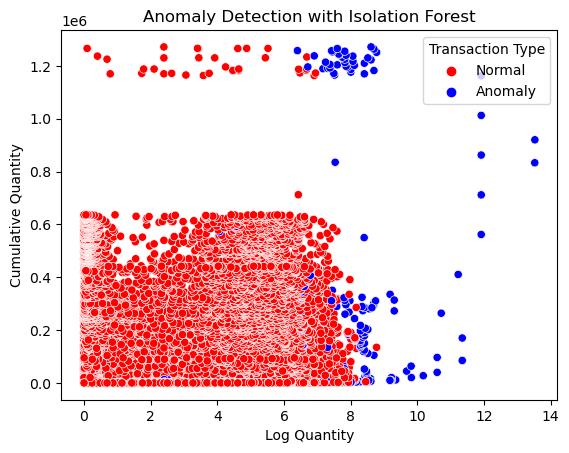

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot anomalies vs normal transactions
sns.scatterplot(
    x=data['Log Quantity'], y=data['Cumulative Quantity'],
    hue=data['Anomaly'].map({-1: 'Anomaly', 1: 'Normal'}),
    hue_order=['Normal', 'Anomaly'],
    palette=['blue', 'red']
)
plt.title("Anomaly Detection with Isolation Forest")
plt.xlabel("Log Quantity")
plt.ylabel("Cumulative Quantity")
plt.legend(title="Transaction Type")
plt.show()



Document Results

In [95]:
#Anomaly Distribution
print(data['Anomaly'].value_counts())


NameError: name 'data' is not defined